<a href="https://colab.research.google.com/github/AceAltair13/facial-expression-recognition/blob/main/EfficientNetB0_FER_2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fer2013:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F786787%2F1351797%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T063428Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D672337c6839923255a7e0317e13a2bff6d6d55ecea7a2f3df3971f272f76c9c85b74774b6ed9f87b44d8d7399b634df499229dd7ac5c18969b7c403c835f9bee9abad233e65152266bfb626eb2c6a0317e5858f565121b696b9d885af1d7527af0147c896d8b1c5a792e29ef03e1b210306a358bc0e6c2a37385343110082bdb251fd0c664ea07a74f3cfe09cb25dcdecdc219278e5dac45999c8cc27404114cbe526068d0745b08f3ea912285896169db2e3d616e6776e18c7f44a015ab2e66384ba0482ca1944a0c9e2ab08ace334df833fd3fcfc56711e6af35e3cae77a26e156ad2f63278a52a58378e8b4632d009ab7ddb46d85052cf88edd7d39744b93'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 63252113 bytes downloaded
Downloaded and uncompressed: fer2013
Data source import complete.


#  **EfficientNet**
EfficientNet, first introduced in Tan and Le, 2019 is among the most efficient models (i.e. requiring least FLOPS for inference) that reaches State-of-the-Art accuracy on both imagenet and common image classification transfer learning tasks.

The smallest base model is similar to MnasNet, which reached near-SOTA with a significantly smaller model. By introducing a heuristic way to scale the model, EfficientNet provides a family of models (B0 to B7) that represents a good combination of efficiency and accuracy on a variety of scales. Such a scaling heuristics (compound-scaling, details see Tan and Le, 2019) allows the efficiency-oriented base model (B0) to surpass models at every scale, while avoiding extensive grid-search of hyperparameters.

A summary of the latest updates on the model is available at here, where various augmentation schemes and semi-supervised learning approaches are applied to further improve the imagenet performance of the models. These extensions of the model can be used by updating weights without changing model architecture.

# **Dataset & Description**

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

[Dataset link ](https://www.kaggle.com/msambare/fer2013)

### Importing Necessary Libraries

In the following code, we are importing all the necessary libraries that we will need for our emotion recognition model. These libraries provide various functionalities such as data manipulation, image processing, and deep learning capabilities.

- `numpy` and `pandas` are used for data manipulation and analysis.
- `matplotlib.pyplot` and `seaborn` are used for data visualization.
- `skimage.io` is used for image reading and writing.
- `keras.backend` provides backend tensor manipulation functions.
- `tensorflow` is the main library for machine learning and neural networks in Python.
- `ImageDataGenerator` is used for real-time data augmentation.
- `EfficientNetB0` and `NASNetLarge` are pre-trained models provided by Keras.
- `Dense`, `Flatten`, `Dropout`, `BatchNormalization`, `Activation` are various layers that can be added to the neural network.
- `Model` and `Sequential` are classes for grouping layers into a model.
- `ReduceLROnPlateau`, `ModelCheckpoint`, `EarlyStopping` are callbacks to be used during training.
- `Adam` is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data.

In [2]:
# Importing necessary libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sn

# Importing library for image reading and writing
import skimage.io

# Importing backend tensor manipulation functions
import keras.backend as K

# Importing main library for machine learning and neural networks
import tensorflow as tf

# Importing class for real-time data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing pre-trained models
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.nasnet import NASNetLarge

# Importing various layers for neural network
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation

# Importing classes for grouping layers into a model
from tensorflow.keras.models import Model, Sequential

# Importing callbacks for use during training
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Importing optimization algorithm
from tensorflow.keras.optimizers import Adam

### Data Augmentation and Preparation

In the following code, we are creating three instances of the `ImageDataGenerator` class from Keras. This class is used to generate batches of tensor image data with real-time data augmentation. The data will be looped over in batches.

1. `training_data_generator`: This is used for the training dataset. It includes parameters for data augmentation such as rotation, width shift, height shift, shear transformation, and flipping.

2. `validation_data_generator`: This is used for the validation dataset. It does not include data augmentation parameters as we want to validate the model on original data.

3. `test_data_generator`: This is used for the test dataset. Similar to the validation data generator, it does not include data augmentation parameters.

In [3]:
# Image data generator for training set with data augmentation
training_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 5,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

# Image data generator for validation set
validation_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

# Image data generator for test set
test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

### Generating Datasets

In the following code, we are generating our training, validation, and test datasets using the `flow_from_directory` method from the `ImageDataGenerator` instances we created earlier. This method generates batches of augmented/normalized data from the respective directories.

1. `training_dataset`: This is our training dataset, generated from the training images located in the directory `../input/fer2013/train`. The images are resized to 48x48 pixels, and the class mode is set to 'categorical' for multi-class labels. The subset is set to 'training' to use the training portion of the data.

2. `validation_dataset`: This is our validation dataset, generated from the same directory as the training dataset but with the subset set to 'validation' to use the validation portion of the data.

3. `test_dataset`: This is our test dataset, generated from the test images located in the directory `../input/fer2013/test`. The images are also resized to 48x48 pixels, and the class mode is set to 'categorical' for multi-class labels.

In [4]:
# Generate training dataset from directory
training_dataset = training_data_generator.flow_from_directory(
    directory = '../input/fer2013/train',
    target_size = (48, 48),
    class_mode = 'categorical',
    subset = 'training',
    batch_size = 64
)

# Generate validation dataset from directory
validation_dataset = validation_data_generator.flow_from_directory(
    directory = '../input/fer2013/train',
    target_size = (48, 48),
    class_mode = 'categorical',
    subset = 'validation',
    batch_size = 64
)

# Generate test dataset from directory
test_dataset = test_data_generator.flow_from_directory(
    directory = '../input/fer2013/test',
    target_size = (48, 48),
    class_mode = 'categorical',
    batch_size = 64
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Loading and Preprocessing Test Image

In the following code, we are loading a test image using Keras' `image` module. The image is resized to 48x48 pixels, which is the input size our model expects. We then display the image using `matplotlib.pyplot` and print its shape to confirm its dimensions.

Next, we add an extra dimension to the image array using `np.expand_dims` to match the input shape that our model expects. This is because our model expects to receive images in batches, even if we're only predicting for one image.

Finally, we load our trained model using `load_model` from Keras.

(48, 48, 3)
(1, 48, 48, 3)


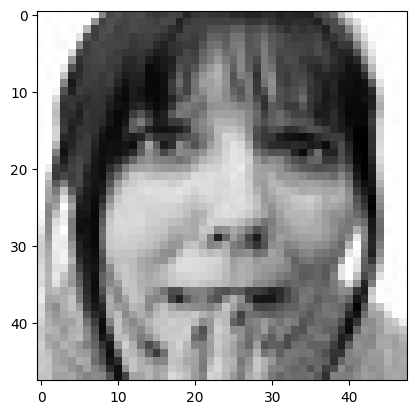

In [5]:
# Import necessary modules
from keras.preprocessing import image
from keras.models import load_model

# Load and resize the image
test_image = image.load_img("../input/fer2013/test/fear/PrivateTest_11251019.jpg", target_size = (48, 48))

# Convert the image to a numpy array
test_image_array = np.array(test_image)

# Display the image
plt.imshow(test_image_array)
print(test_image_array.shape)

# Add an extra dimension to match the model's input shape
test_image_array = np.expand_dims(test_image_array, axis = 0)
print(test_image_array.shape)

# **Loading Pre-trained Model**

The following code loads the EfficientNetB0 model with pre-trained weights from ImageNet. The model is configured to accept input images of shape 48x48x3 and does not include the top (fully-connected) layers.

In [6]:
# Load the base model from EfficientNetB0 with pre-trained weights
efficient_net_base_model = tf.keras.applications.EfficientNetB0(
    input_shape = (48, 48, 3),
    include_top = False,
    weights = "imagenet"
)

### Model Customization and Summary

In the following code, we first freeze the last four layers of the base model to prevent them from being updated during training.

We then build our custom model by adding the base model and several other layers to a `Sequential` model. These layers include dropout layers for regularization, flatten layer to convert the feature maps to a one-dimensional vector, batch normalization layers to normalize the activations of the layers, dense layers for learning the features, and activation layers for introducing non-linearity.

Finally, we print a summary of our model to view its architecture and the number of parameters.

In [7]:
# Freezing the last four layers of the base model
for layer in efficient_net_base_model.layers[:-4]:
    layer.trainable = False

# Building the custom model
custom_model = Sequential()
custom_model.add(efficient_net_base_model)
custom_model.add(Dropout(0.5))
custom_model.add(Flatten())
custom_model.add(BatchNormalization())
custom_model.add(Dense(32, kernel_initializer='he_uniform'))
custom_model.add(BatchNormalization())
custom_model.add(Activation('relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(32, kernel_initializer='he_uniform'))
custom_model.add(BatchNormalization())
custom_model.add(Activation('relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(32, kernel_initializer='he_uniform'))
custom_model.add(BatchNormalization())
custom_model.add(Activation('relu'))
custom_model.add(Dense(7, activation='softmax'))

# Printing the summary of the custom model
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 2, 2, 1280)        4049571   
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 2, 1280)        0         
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 batch_normalization (Batch  (None, 5120)              20480     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                163872    
                                                                 
 batch_normalization_1 (Bat  (None, 32)                1

### Visualizing the Model Architecture

In the following code, we are using the `plot_model` function from Keras to visualize our model's architecture. This function generates a plot of the model and saves it as an image file. We then display this image using the `Image` function from the IPython.display module.

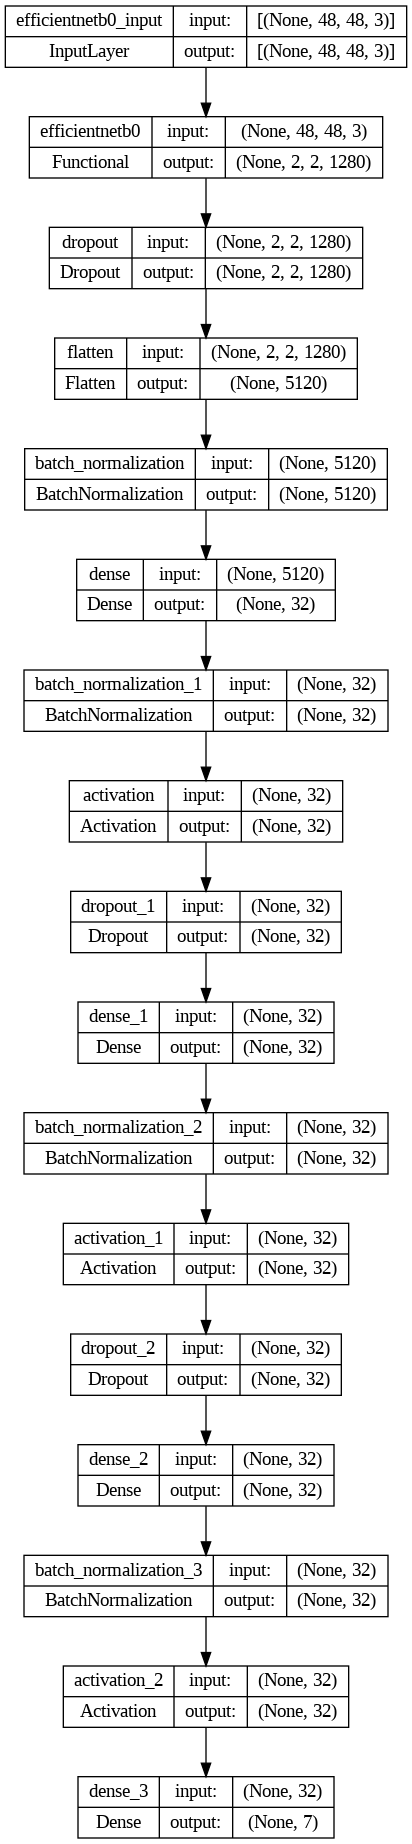

In [8]:
# Import necessary modules
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Generate a plot of the model and save it as an image file
plot_model(custom_model, to_file = 'model_architecture.png', show_shapes = True, show_layer_names = True)

# Display the image
Image(filename = 'model_architecture.png')

### Defining F1 Score Function

In the following code, we are defining a function to calculate the F1 score, which is a measure of a model's accuracy. The F1 score is the harmonic mean of precision and recall. We use Keras backend functions to calculate true positives, possible positives, and predicted positives, which are then used to calculate precision, recall, and the F1 score.

In [9]:
def f1_score(actual_values, predicted_values):
    true_positives = K.sum(K.round(K.clip(actual_values * predicted_values, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(actual_values, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(predicted_values, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_score = 2 * (precision*recall) / (precision+recall + K.epsilon())
    return f1_score

### Defining Metrics for Model Evaluation

In the following code, we are defining a list of metrics that we want to calculate during model training. These metrics include binary accuracy, precision, recall, AUC (Area Under the ROC Curve), and the custom F1 score function we defined earlier.

In [10]:
evaluation_metrics = [
      tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
      tf.keras.metrics.Precision(name = 'precision'),
      tf.keras.metrics.Recall(name = 'recall'),
      tf.keras.metrics.AUC(name = 'auc'),
      f1_score,
]

### Defining Callbacks for Model Training

In the following code, we are defining three callbacks to be used during model training:

1. `ReduceLROnPlateau`: This callback reduces the learning rate when a metric has stopped improving. In this case, the learning rate will be reduced when the validation loss stops improving.

2. `ModelCheckpoint`: This callback saves the model after every epoch.

3. `EarlyStopping`: This callback stops training when a monitored metric has stopped improving. In this case, training will stop when the validation loss stops improving.

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=20, verbose=1, factor=0.50, min_lr=1e-10)

model_checkpoint = ModelCheckpoint('model.h5')

early_stopping = EarlyStopping(verbose=1, patience=20)

# **Compiling and Training the Model**

In the following code, we are first compiling the model with the Adam optimizer, categorical crossentropy as the loss function, and our defined metrics for evaluation.

We then fit the model to our training data with validation data, for 50 epochs, and with our defined callbacks. The `verbose` parameter is set to 1, which means the method will output detailed information about the training process.

In [12]:
# Compile the model
custom_model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = evaluation_metrics
)

# Fit the model to the training data
training_history = custom_model.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = 50,
    verbose = 1,
    callbacks = [
        learning_rate_reduction,
        model_checkpoint,
        early_stopping
    ]
)

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 1.9218 - accuracy: 0.8550 - precision: 0.1916 - recall: 0.0046 - auc: 0.6046 - f1_score: 0.0087

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


359/359 [==============================] - 49s 114ms/step - loss: 1.9218 - accuracy: 0.8550 - precision: 0.1916 - recall: 0.0046 - auc: 0.6046 - f1_score: 0.0087 - val_loss: 1.8378 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6129 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/50
359/359 [==============================] - 39s 108ms/step - loss: 1.8383 - accuracy: 0.8571 - precision: 0.3226 - recall: 4.3539e-04 - auc: 0.6292 - f1_score: 8.5708e-04 - val_loss: 1.8226 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6263 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 3/50
359/359 [==============================] - 39s 107ms/step - loss: 1.8278 - accuracy: 0.8571 - precision: 0.2500 - recall: 4.3539e-05 - auc: 0.6337 - f1_score: 8.5708e-05 - val_loss: 1.8134 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6441 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 4/50
359/35

# **Plotting Training and Validation Metrics**

In the following code, we define a function `Train_Val_Plot` to plot the history of accuracy, loss, AUC, precision, and F1 score for both training and validation data.

We then call this function, passing in the history of these metrics from the model training process.

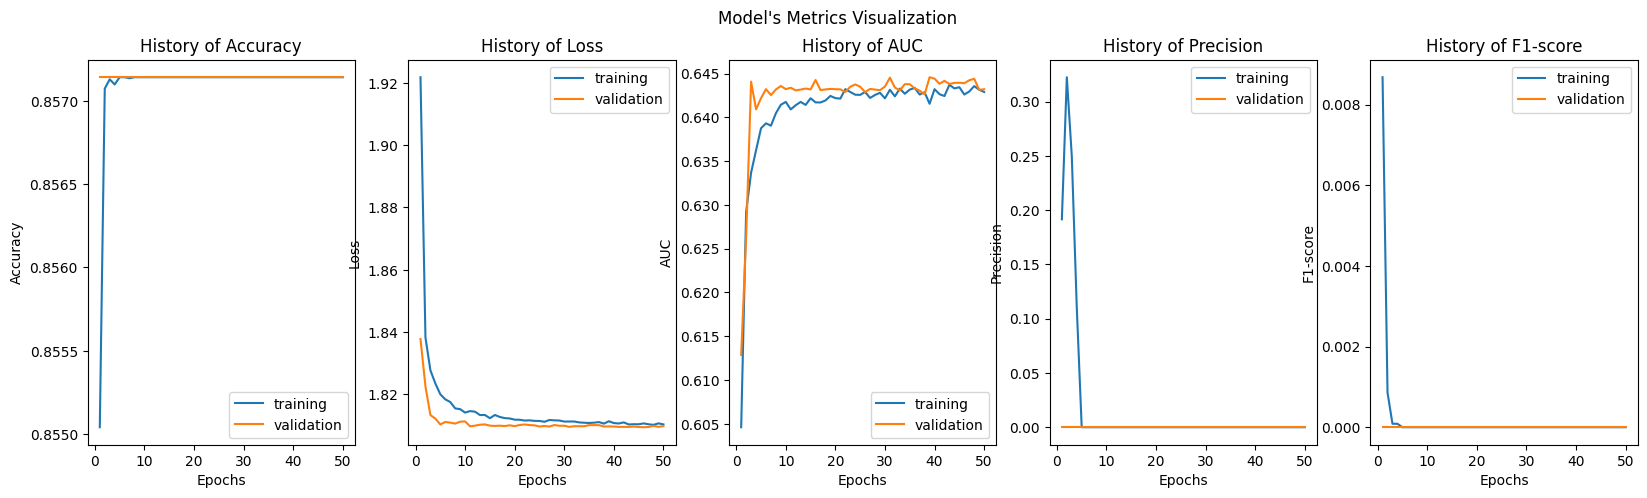

In [13]:
# Define a function to plot training and validation metrics
def plot_training_and_validation_metrics(training_accuracy, validation_accuracy, training_loss, validation_loss, training_auc, validation_auc, training_precision, validation_precision, training_f1, validation_f1):
    # Create a figure with 5 subplots for 5 metrics
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 5))
    fig.suptitle("Model's Metrics Visualization")

    # Define a list of metrics to plot
    metrics = [
        (training_accuracy, validation_accuracy, 'Accuracy', ax1),
        (training_loss, validation_loss, 'Loss', ax2),
        (training_auc, validation_auc, 'AUC', ax3),
        (training_precision, validation_precision, 'Precision', ax4),
        (training_f1, validation_f1, 'F1-score', ax5),
    ]

    # Loop through the metrics list and plot each metric
    for training, validation, metric_name, ax in metrics:
        ax.plot(range(1, len(training) + 1), training)
        ax.plot(range(1, len(validation) + 1), validation)
        ax.set_title(f'History of {metric_name}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel(metric_name)
        ax.legend(['training', 'validation'])

    # Display the plots
    plt.show()

# Call the function with the history of metrics from the model training process
plot_training_and_validation_metrics(
    training_history.history['accuracy'], training_history.history['val_accuracy'],
    training_history.history['loss'], training_history.history['val_loss'],
    training_history.history['auc'], training_history.history['val_auc'],
    training_history.history['precision'], training_history.history['val_precision'],
    training_history.history['f1_score'], training_history.history['val_f1_score']
)